## Linear Regression
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types: Simple Regression and Multivariable Regression

**Simple regression**  
Simple linear regression uses traditional slope-intercept form, where ***m*** and ***b*** are the variables our algorithm will try to “learn” to produce the most accurate predictions. ***x*** represents our input data and ***y*** represents our prediction.  
                                                `y = mx + b`

The slope(m) of the best-fit line is defined by:  
<img src="https://pythonprogramming.net/static/images/machine-learning/best-fit-slope.png">  
The bar over the letters signifies a mean/average.  
<br>
The intercept(b) is defined by:  
<img src="https://pythonprogramming.net/static/images/machine-learning/best-fit-y-intercept.png">  

Lets implement Linear Regression on our own!

In [1]:
from statistics import mean
import numpy as np

In [2]:
# lets create couple of nympy arrays
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

In [3]:
# function that returns a slope and intercept for given x and y coordinates
def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [4]:
m, b = best_fit_slope_and_intercept(xs,ys)
m, b

(0.29999999999999893, 4.300000000000003)

In [5]:
regression_line = [(m*x)+b for x in xs]

Lets plot the data using our own regression algo

In [6]:

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

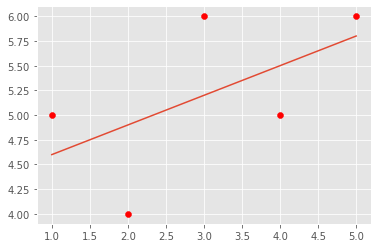

In [7]:
plt.scatter(xs,ys,color='r')
plt.plot(xs, regression_line)
plt.show()

Lets predict some data

In [8]:
predict_x = 7
predict_y = (m*predict_x)+b
print(predict_y)

6.399999999999996


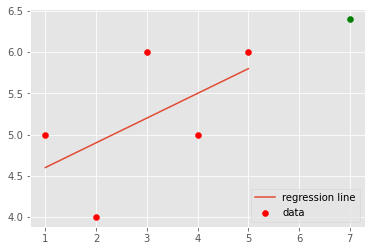

In [9]:
plt.scatter(xs,ys,color='r',label='data')
plt.scatter(predict_x,predict_y,color='g')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

Now we need to know ***How well our line fits the data?***  
One of the parameters we can consider is **R-Squared or the Coefficient of Determination**  

## What Is R-squared?

R-squared is a statistical measure of how close the data are to the fitted regression line.  
The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. i.e. `R-squared = Explained variation / Total variation`  
<br>
R-squared is always between 0 and 100%:

- 0% indicates that the model explains none of the variability of the response data around its mean.
- 100% indicates that the model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits your data.  
More on R-squared <a href="https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit">here.</a>

### How do we calculate it?
The distance between the regression line's y values, and the data's y values is the error, then we square that. The line's squared error is either a mean or a sum of this, we'll simply sum it.  

**Why are we squaring errors? Why not just adding them up?**  
First, we want a way to normalize the error as a distance, so the error might be -5, but when squared, that's a positive number. Another reason is to further punish for outliers. The "further" off something is, the more the it affects the error. This is simply the standard people use. You could use the power of 4, 6, 8, or whatever. You could also just use the absolute value of the errors. We'll stick with squared, as that is the standard almost everyone uses.

**Equation:**  
<img src="https://pythonprogramming.net/static/images/machine-learning/coefficient-of-determination-r-squared.png">  

i.e. 1 minus the division of the squared error of the regression line and the squared error of the mean y line.  
The mean y line is quite literally the mean of all of the y values from the dataset. If you were to graph it, then it would be a flat, horizontal, line. Thus, we do the squared error of the average y, and of the regression line. The objective here is to discern how much of the error is actually just simply a result in variation in the data features, as opposed to being a result of the regression line being a poor fit.


Lets calculate the squared error

In [10]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

Now, lets calculate the R-squared or Coefficient of Determination

In [11]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = mean(ys_orig)
    
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    
    return 1 - (squared_error_regr / squared_error_y_mean)

In [12]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.3214285714285714


That's a pretty low value, so actually our best-fit line isn't all that great according to this measure. But look at our actual dataset though. We stuck with low, whole numbers. Variance from value to value was 20-50% at some points, that's a very high variance. It should not be all that surprising that, with this simple dataset, our best fit line still wasn't that descriptive of the actual data.

**Assumption**  
- What we've just described is an assumption. While we can logically agree with the assumption, we need to come up with a way to test the assumption.  
- The algorithms involved so far are pretty basic, we have only a few layers going on here, so there is not too much room for error. But, later on, we are likely to have layers upon layers.  
- So wherever possible, we need to test these to make sure our assumptions about how these algorithms are meant to act are true. Consider how simple it would be to screw up the order of operations in a function, and then, from there, disrupt the entire validity of thousands of lines of code after that!

## Testing
Our assumption is that we created a best fit line, which we then tested with a coefficient of determination method. We know (mathematically) that the r squared value will be **lower when the best-fit line is worse**, and **higher (closer to 1), when the best fit line is better**.  
<br>
Now lets create a sample dataset to test our assumptions

In [13]:
import random 
def create_dataset(no_of_items, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(no_of_items):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
            
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

Lets take a look at the parameters:
- **no_of_items**: This is how many datapoints that we want in the set.
- **variance**: This will dictate how much each point can vary from the previous point. The more variance, the less-tight the data will be.
- **step**: This will be how far to step on average per point, defaulting to 2.
- **correlation**: This will be either False, pos, or neg to indicate that we want no correlation, positive correlation, or negative correlation.

In [23]:
xs, ys = create_dataset(40,40,2, correlation='pos')

Now lets calculate slope and intercept once again to generate regression line

In [24]:
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

Finally, lets plot the graph!

0.24502812496171555


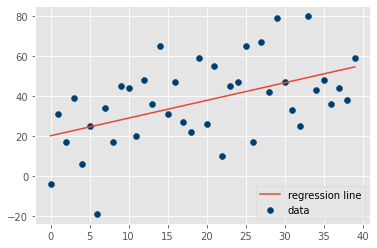

In [25]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

Now you can play around with the ***create_dataset*** function. Try changing the variance and correlation to see the difference in data and respective regression line.